In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('econ.csv').drop('Unnamed: 0', axis=1)

In [20]:
df.head(3)

,departure_time,arrival_time,distance,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,...,source_city_Chennai,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,source_city_New Delhi,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,destination_city_New Delhi
0,2,5,1160.540574,2.17,1,5953,39339998,21747892,598922,224309,...,0,0,0,0,1,0,0,0,1,0
1,1,4,1160.540574,2.33,1,5953,39339998,21747892,598922,224309,...,0,0,0,0,1,0,0,0,1,0
2,1,1,1160.540574,2.17,1,5956,39339998,21747892,598922,224309,...,0,0,0,0,1,0,0,0,1,0


In [21]:
X = df.drop('price', axis=1)
y = df['price']

In [22]:
X_cols = X.columns

((19531, 20), (8371, 20), (19531,), (8371,))

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X_cols)

y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

y_scaled = pd.DataFrame(y_scaled, columns=['price'])


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((19531, 20), (8371, 20), (19531, 1), (8371, 1))

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Feature extraction
model = RandomForestRegressor(n_estimators=100, random_state=0)
rfe = RFE(model)
fit = rfe.fit(x_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/fea

Num Features: 10
Selected Features: [ True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1  4 11  2 10  5  3  9  7  6  8]


In [33]:
feats_selected = list(fit.get_feature_names_out())

In [35]:
feats_selected

['departure_time',
 'arrival_time',
 'distance',
 'duration',
 'days_left',
 'origin_airport_capacity',
 'arrival_airport_capacity',
 'origin_GDP',
 'des_GDP',
 'carrier_category']

In [38]:
x_tr_selected = x_train[feats_selected]
x_te_selected = x_test[feats_selected]

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
quantiles = [0.01, 0.05, 0.50, 0.95, 0.99]

# Derive the model and the predictions in (a) - (b)
def GBM(q):
    
   # (a) Modeling  
   mod = GradientBoostingRegressor(loss='quantile', alpha=q,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=20,
                                min_samples_split=20)
   mod.fit(x_tr_selected, y_train)

   # (b) Predictions
   pred = pd.Series(mod.predict(x_te_selected).round(2))
   return pred, mod

GBM_models=[]
GBM_actual_pred = pd.DataFrame()

for q in quantiles:
    pred , model = GBM(q)
    GBM_models.append(model)
    GBM_actual_pred = pd.concat([GBM_actual_pred,pred],axis=1)

/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sding/opt/anaconda3/envs/msca/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when 

In [41]:
x_te_selected

,departure_time,arrival_time,distance,duration,days_left,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category
19189,0.905267,-1.713844,0.282583,0.317155,1.679168,-0.937009,1.583373,-1.151394,1.634560,2.077909
16552,-0.253844,1.090895,0.901543,0.317155,1.094031,-0.470545,-0.934949,-0.453497,-1.154683,-0.481253
7640,0.905267,0.529947,-0.063008,-0.463131,-1.173375,0.014557,1.583373,-0.606407,1.634560,-0.481253
13966,1.484822,1.090895,1.325713,0.792939,-0.076243,-0.470545,1.583373,-0.453497,1.634560,2.077909
15760,-0.253844,-0.591949,-0.834679,-0.634413,0.947747,-0.470545,0.018126,-0.453497,-0.607734,-0.481253
...,...,...,...,...,...,...,...,...,...,...
15308,-0.253844,1.090895,-0.834679,-0.786664,-0.295670,-0.470545,0.018126,-0.453497,-0.607734,-0.481253
10606,0.905267,0.529947,-0.834679,-1.110197,0.508894,0.014557,-0.467745,-0.606407,-0.454275,-0.481253
21264,-0.833399,0.529947,0.429964,0.317155,-0.661380,-0.937009,-1.068660,-1.151394,-0.507050,-0.481253
8778,-0.833399,0.529947,-0.063008,-0.158629,0.289467,0.014557,1.583373,-0.606407,1.634560,-0.481253


In [40]:
GBM_actual_pred

,0,0,0,0,0
0,-0.92,-0.20,-0.01,0.40,1.07
1,-0.92,-0.69,-0.30,0.14,0.32
2,-0.91,-0.75,0.91,1.38,1.83
3,-0.91,-0.35,0.23,0.31,0.77
4,-0.93,-0.87,-0.84,-0.37,0.04
...,...,...,...,...,...
8366,-0.92,-0.88,-0.85,-0.53,-0.03
8367,-0.92,-0.90,-0.89,-0.55,-0.19
8368,-0.92,-0.53,0.64,1.48,2.99
8369,-0.91,-0.81,-0.79,-0.46,-0.18


NameError: name 'df_f2' is not defined

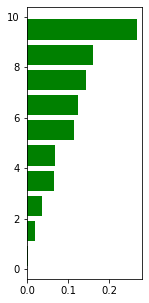

In [42]:
fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = GBM_models[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='green')
    plt.yticks(pos, np.array(feats_selected)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()